In [158]:
import cv2
import numpy as np
import imutils
from matplotlib import pyplot as plt

def load_image(path):
    """
    return bgr, rgb, hsv
    """
    bgr_img = cv2.imread(path)
    b,g,r = cv2.split(bgr_img)       # get b,g,r
    image = cv2.merge([r,g,b])
    hsv_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2HSV)
    return bgr_img, image, hsv_img

def white_image(img):
    white = np.zeros(img.shape,dtype=np.uint8)
    white.fill(255)
    return white

# Weekly project part 1
Using the image "appletree.jpg"
1) Can you segment the apples from the tree?
2) Can you get the computer to count how many there are? 
    How close can you get to the ground truth? (there are 26 apples in the image)
3) Can you change the color of one of them?
4) Can you segment the leaves?

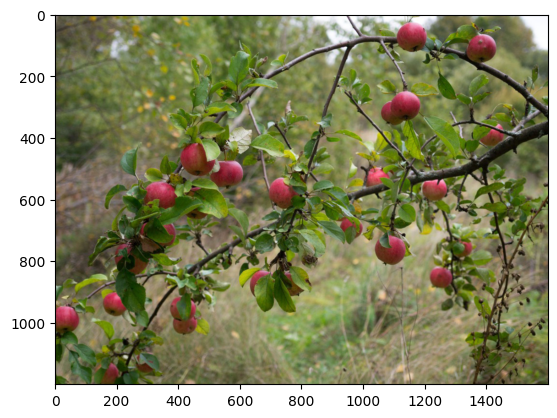

In [159]:
bgr, rgb, hsv = load_image("appletree.jpg")

plt.imshow(rgb)

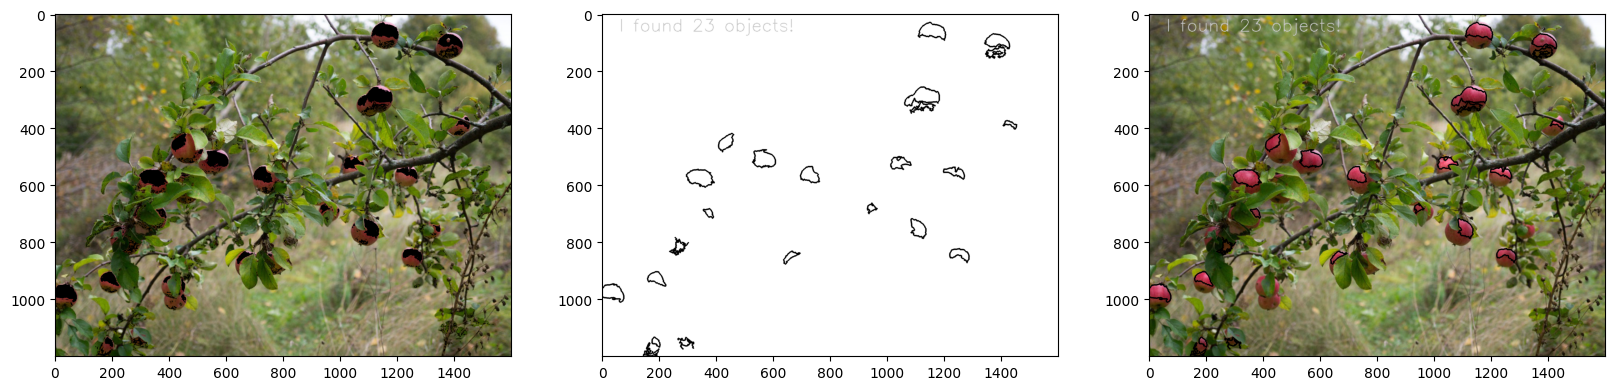

In [163]:
def is_valid_cnt(cnt):
    area = cv2.contourArea(cnt)
    perimeter = cv2.arcLength(cnt,True)
    if perimeter < 1800 and 500 < area:
        #print(perimeter, area)
        return True
    return False

def draw_ctns_and_add_text(img, cnts):
    output = img.copy()
    valid_cnts = [c for c in cnts if is_valid_cnt(c)]
    
    for c in valid_cnts:
        # draw each contour on the output image with a 3px thick black outline
        cv2.drawContours(output, [c], -1, (0, 0, 0), 3)
    
    text = "I found {} objects!".format(len(valid_cnts))
    cv2.putText(output, text, (60, 60),  cv2.FONT_HERSHEY_SIMPLEX, 2, (200,200,200), 2)

    return output

fig = plt.figure(figsize=(20,8))
apple_h = cv2.inRange(hsv, (330/2, 0.35*255, 0.4*255), (360/2, 255, 255))
apple_l = cv2.inRange(hsv, (0, 0.75*255, 0.15*255), (40, 0.85*255, 0.35*255))
apple = cv2.bitwise_or(apple_h,apple_l)

cnts = cv2.findContours(apple.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

ax = fig.add_subplot(1,3,1)
ax.imshow(cv2.bitwise_or(rgb,rgb, mask=255 - apple))
ax = fig.add_subplot(1,3,2)
ax.imshow(draw_ctns_and_add_text(white_image(rgb), cnts))
ax = fig.add_subplot(1,3,3)
ax.imshow(draw_ctns_and_add_text(rgb, cnts))

1. See previous images
2. If looked closely, it's possible to see that it correctly found 21 apples (out of 26) but some are confused as one apple, others are mistaken for two. It could probably be improved by changing the threshold of colour, threshold, exclude too close contours to another threshold. But this would also reduce the capacity to find in other context.
3. See image on the left, some apples are coloured in black
4. Given the green background, it seems very hard to isolated, there will be a lot of false positive.

# Weekly project part 2
1) Remove the greenscreen and replace the background in "itssp.png".
2) Can you improve the edge with eroding/dilating?

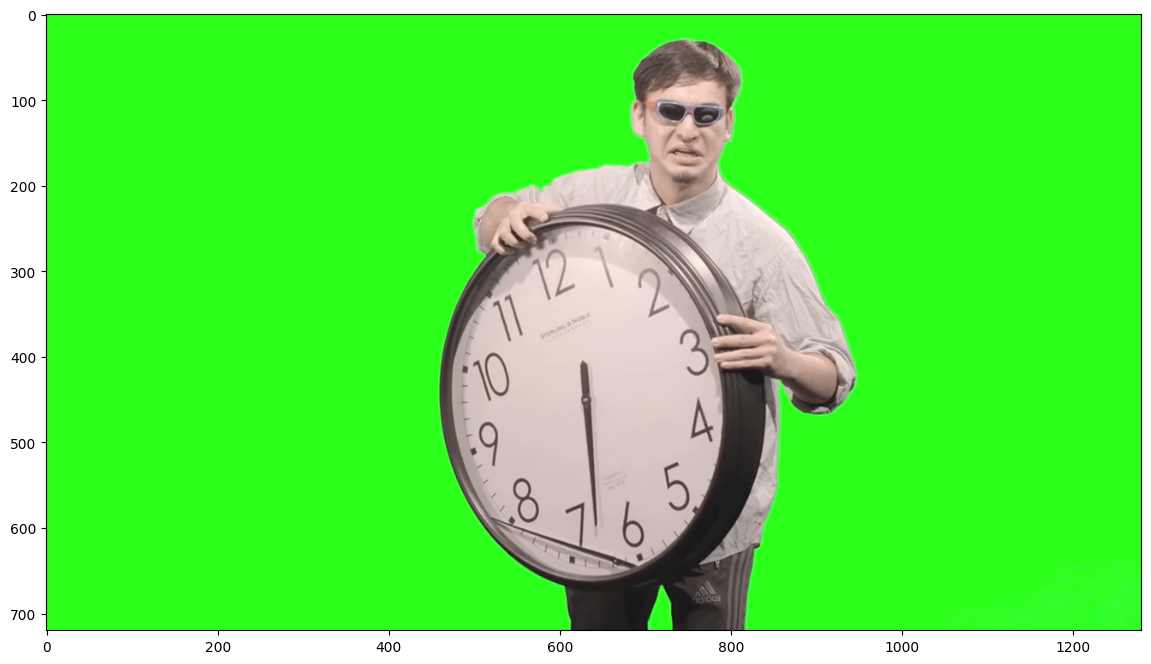

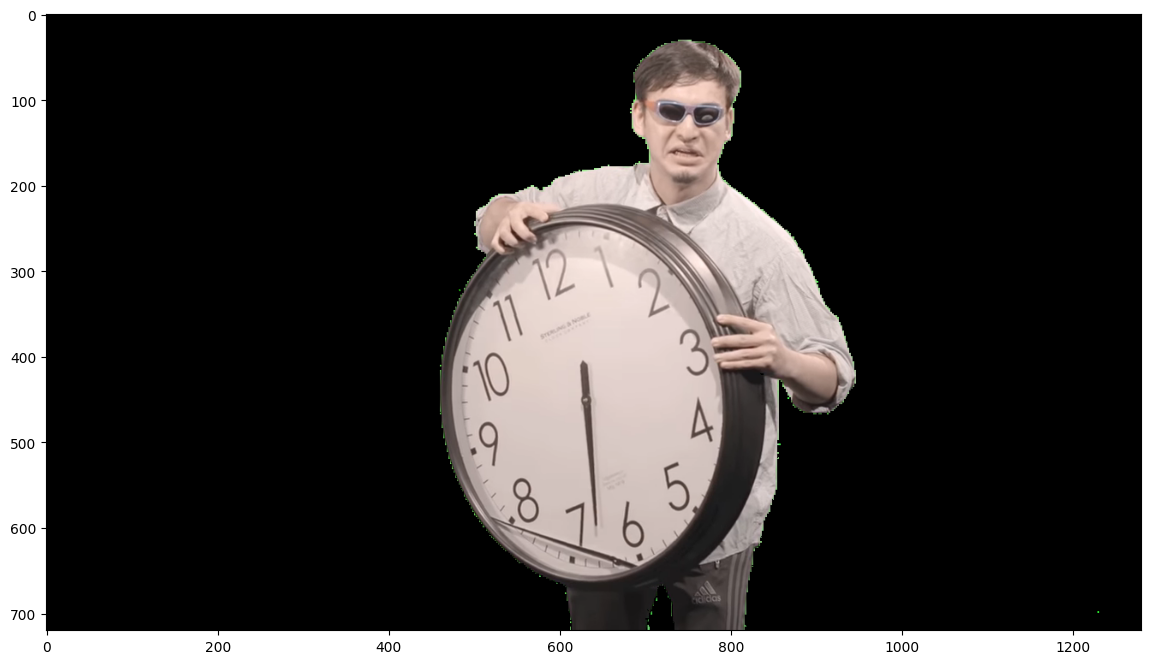

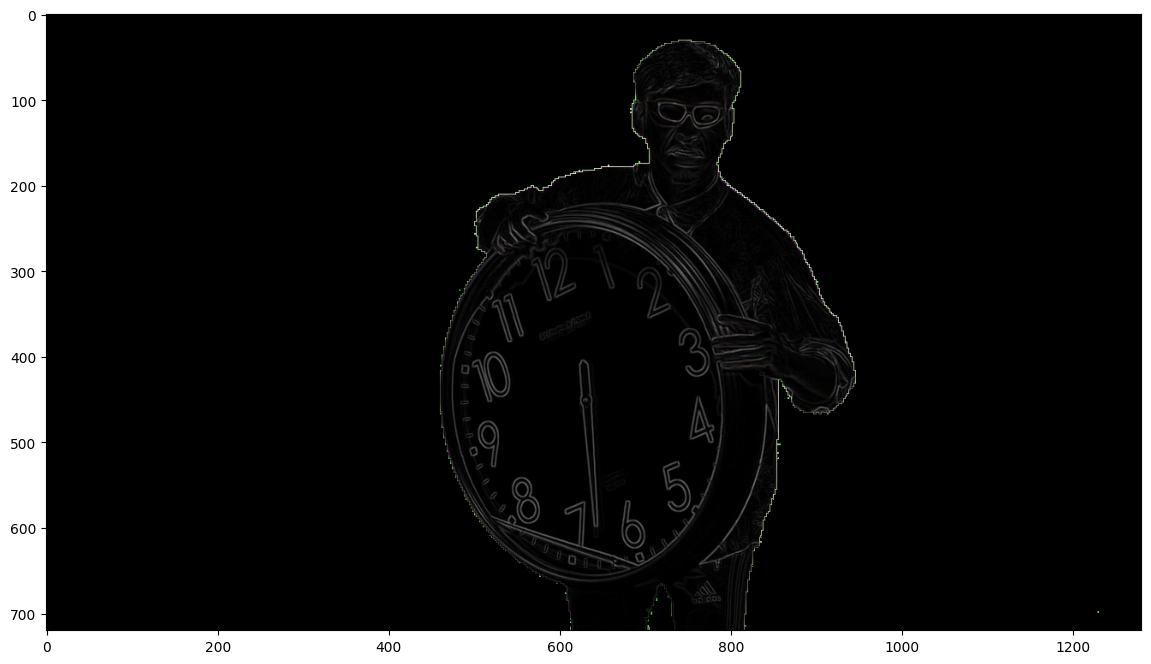

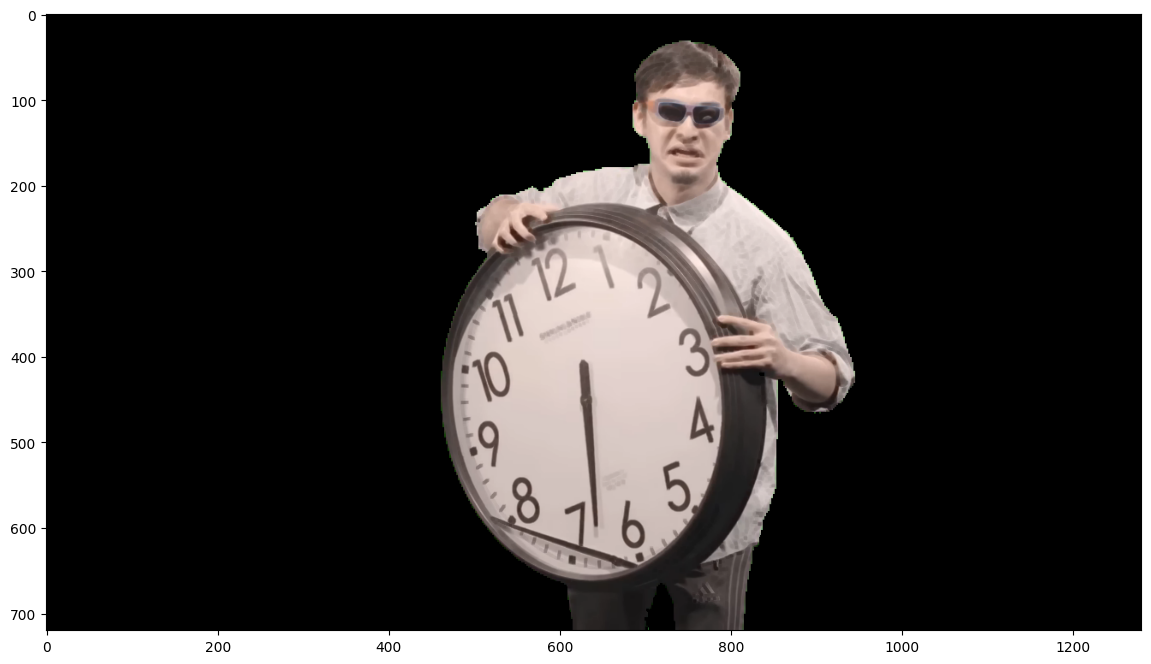

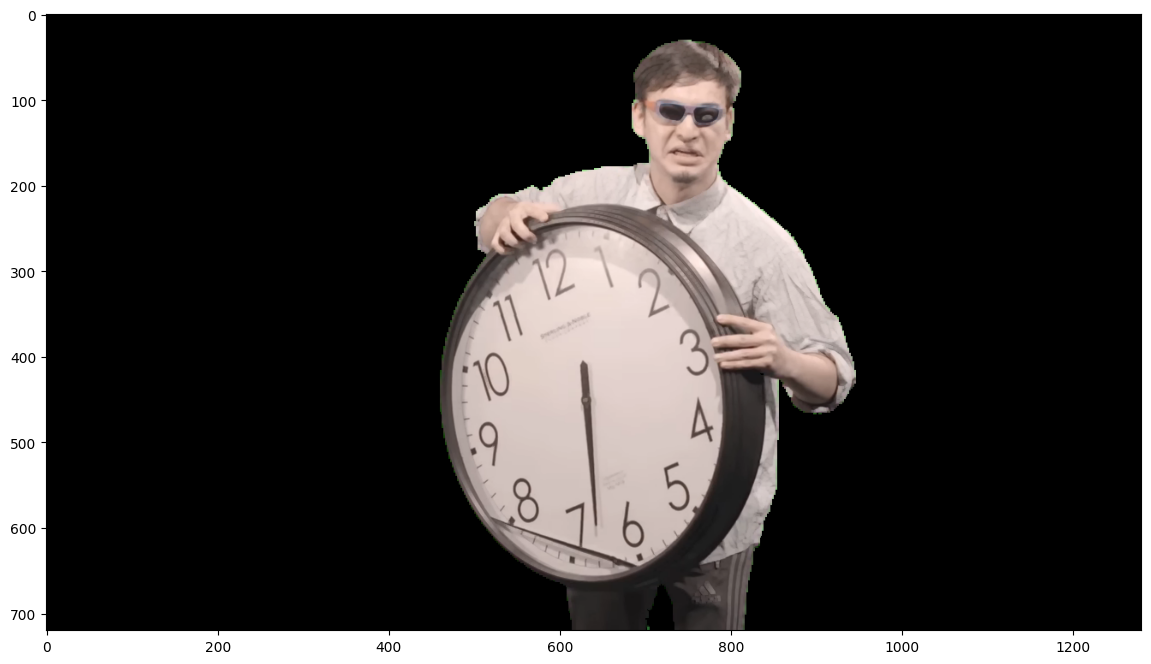

In [156]:
bgr, rgb, hsv = load_image("ittsp.png")
green = cv2.inRange(hsv, (57, 0, 0), (60, 255, 255))
nobackground = cv2.bitwise_or(rgb,rgb, mask=255 - green)

eroded = cv2.erode(nobackground, None, iterations = 1)
countour = nobackground - eroded
dilated = cv2.dilate(eroded, None, iterations = 1)

plt.figure(figsize=(20,8))
plt.imshow(rgb)
plt.figure(figsize=(20,8))
plt.imshow(nobackground)
plt.figure(figsize=(20,8))
plt.imshow(countour)
plt.figure(figsize=(20,8))
plt.imshow(eroded)
plt.figure(figsize=(20,8))
plt.imshow(dilated)
